In [1]:
import pandas as pd
import inventorize3 as inv

In [2]:
skus = pd.read_csv('sku_distributions.csv')
apple_juice = skus[['apple_juice']]

In [3]:
mean_apple_juice = apple_juice['apple_juice'].mean()
std_apple_juice = apple_juice['apple_juice'].std()
lead_time = 7

In [4]:
### min Q policy (when reach min, order Q)

apple_sQ = inv.sim_min_Q_normal(demand = apple_juice['apple_juice'], 
                     mean = mean_apple_juice, 
                     sd = std_apple_juice, 
                     leadtime = lead_time, 
                     service_level = 0.8, 
                     Quantity = 100, 
                     shortage_cost = 1, 
                     ordering_cost = 1, 
                     inventory_cost = 1)
apple_sQ[0]

,period,demand,sales,inventory_level,inventory_position,min,order,recieved,lost_order
0,1,0,0.0,750.0,750.0,750,0.0,0.0,0.0
1,2,96,96.0,654.0,754.0,750,100.0,0.0,0.0
2,3,92,92.0,562.0,662.0,750,0.0,0.0,0.0
3,4,84,84.0,478.0,678.0,750,100.0,0.0,0.0
4,5,113,113.0,365.0,665.0,750,100.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
329,330,88,88.0,28.0,728.0,750,100.0,100.0,0.0
330,331,77,77.0,51.0,751.0,750,100.0,100.0,0.0
331,332,88,88.0,63.0,663.0,750,0.0,100.0,0.0
332,333,85,85.0,78.0,678.0,750,100.0,100.0,0.0


In [5]:
grape_juice = skus[['grape_juice']]
mean_grape_juice = grape_juice['grape_juice'].mean()
std_grape_juice = grape_juice['grape_juice'].std()

In [6]:
### min max policy (when reach min, order up to max)

grape_sS = inv.sim_min_max_pois(demand = grape_juice['grape_juice'], 
                     lambda1 = mean_grape_juice, 
                     leadtime = lead_time, 
                     service_level = 0.8, Max = 25, 
                     shortage_cost = 1, 
                     ordering_cost = 1, 
                     inventory_cost = 1)
grape_sS[0]

,period,demand,sales,inventory_level,inventory_position,min,order,max,recieved,lost_order
0,1,0,0.0,21.0,21.0,21.0,0.0,25,0.0,0.0
1,2,0,0.0,21.0,25.0,21.0,4.0,25,0.0,0.0
2,3,3,3.0,18.0,22.0,21.0,0.0,25,0.0,0.0
3,4,1,1.0,17.0,21.0,21.0,0.0,25,0.0,0.0
4,5,2,2.0,15.0,23.0,21.0,4.0,25,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
329,330,2,2.0,13.0,22.0,21.0,0.0,25,0.0,0.0
330,331,0,0.0,18.0,22.0,21.0,0.0,25,5.0,0.0
331,332,0,0.0,18.0,22.0,21.0,0.0,25,0.0,0.0
332,333,1,1.0,17.0,21.0,21.0,0.0,25,0.0,0.0


In [7]:
cantalop_juice = skus[['cantalop_juice']]
mean_cantalop_juice = cantalop_juice['cantalop_juice'].mean()
std_cantalop_juice = cantalop_juice['cantalop_juice'].std()

In [8]:
### periodic review policy (order up to max every time period)

cantalop_RS = inv.Periodic_review_pois(demand = cantalop_juice['cantalop_juice'], 
                     lambda1 = mean_cantalop_juice, 
                     leadtime = lead_time, 
                     service_level = 0.9, Review_period = 10, 
                     shortage_cost = 1, 
                     ordering_cost = 1, 
                     inventory_cost = 1)
cantalop_RS[0]

,period,demand,sales,inventory_level,inventory_position,order,max,recieved,lost_order
0,1,0,0.0,238.0,238.0,0.0,238.0,0.0,0.0
1,2,10,10.0,228.0,228.0,0.0,238.0,0.0,0.0
2,3,10,10.0,218.0,218.0,0.0,238.0,0.0,0.0
3,4,9,9.0,209.0,209.0,0.0,238.0,0.0,0.0
4,5,10,10.0,199.0,199.0,0.0,238.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
329,330,10,10.0,143.0,143.0,0.0,238.0,0.0,0.0
330,331,11,11.0,132.0,227.0,95.0,238.0,0.0,0.0
331,332,11,11.0,121.0,216.0,0.0,238.0,0.0,0.0
332,333,10,10.0,111.0,206.0,0.0,238.0,0.0,0.0


In [9]:
### hybird policy (when it comes to min level or after a period, order up to max)

cantalop_RsS = inv.Hibrid_pois(demand = cantalop_juice['cantalop_juice'], 
                     lambda1 = mean_cantalop_juice, 
                     leadtime = lead_time, 
                     service_level = 0.9, Review_period = 3, Min = 120,
                     shortage_cost = 1, 
                     ordering_cost = 1, 
                     inventory_cost = 1)
cantalop_RsS[0]

,period,demand,sales,inventory_level,min,inventory_position,order,max,recieved,lost_order
0,1,0,0.0,140.0,120,140.0,0.0,140.0,0.0,0.0
1,2,10,10.0,130.0,120,130.0,0.0,140.0,0.0,0.0
2,3,10,10.0,120.0,120,120.0,0.0,140.0,0.0,0.0
3,4,9,9.0,111.0,120,131.0,20.0,140.0,0.0,0.0
4,5,10,10.0,101.0,120,121.0,0.0,140.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
329,330,10,10.0,55.0,120,130.0,20.0,140.0,0.0,0.0
330,331,11,11.0,64.0,120,129.0,10.0,140.0,20.0,0.0
331,332,11,11.0,62.0,120,118.0,0.0,140.0,9.0,0.0
332,333,10,10.0,52.0,120,130.0,22.0,140.0,0.0,0.0


In [10]:
### base policy (set up a base stock level and every day, order the sold quantity to reach to base stock)

apple_base = inv.sim_base_normal(demand = apple_juice['apple_juice'], 
                     mean = mean_apple_juice, 
                     sd = std_apple_juice, 
                     leadtime = lead_time, 
                     service_level = 0.8, 
                     shortage_cost = 1, 
                     ordering_cost = 100, 
                     inventory_cost = 1)
apple_base[0]

,period,demand,sales,inventory_level,inventory_position,Base,order,recieved,lost_order
0,1,0,0.0,750.0,750.0,750,0.0,0.0,0.0
1,2,96,96.0,654.0,750.0,750,96.0,0.0,0.0
2,3,92,92.0,562.0,750.0,750,92.0,0.0,0.0
3,4,84,84.0,478.0,750.0,750,84.0,0.0,0.0
4,5,113,113.0,365.0,750.0,750,113.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
329,330,88,88.0,40.0,750.0,750,88.0,67.0,0.0
330,331,77,77.0,55.0,750.0,750,77.0,92.0,0.0
331,332,88,88.0,79.0,750.0,750,88.0,112.0,0.0
332,333,85,85.0,78.0,750.0,750,85.0,84.0,0.0


In [11]:
import matplotlib.pyplot as plt

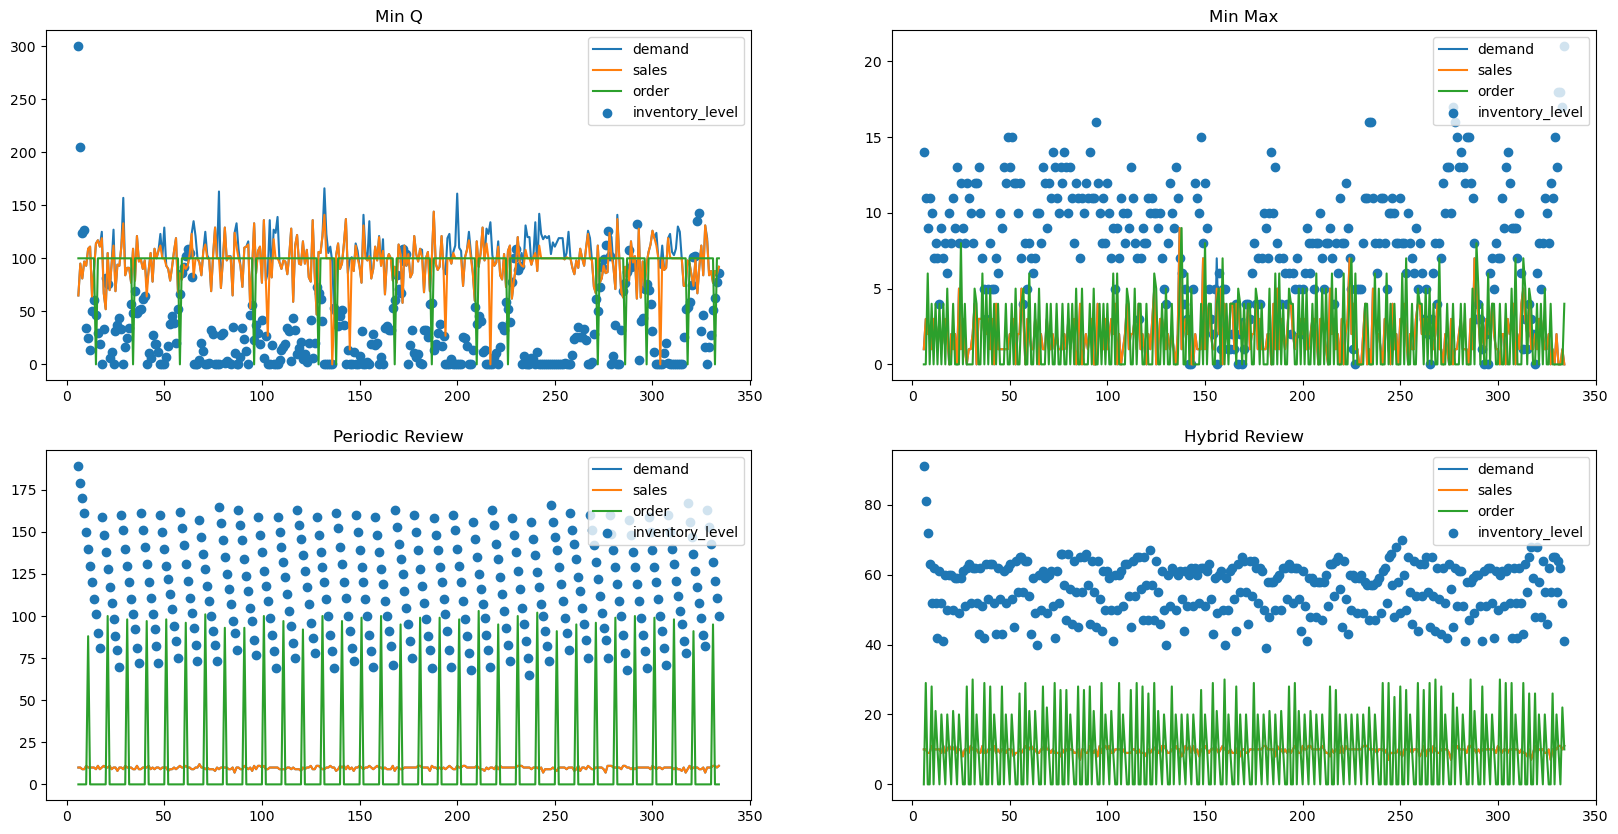

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10)) 

plt.subplot(2,2,1)
plt.plot(apple_sQ[0]['period'][5:], apple_sQ[0]['demand'][5:], label = 'demand')
plt.plot(apple_sQ[0]['period'][5:], apple_sQ[0]['sales'][5:], label = 'sales')
plt.plot(apple_sQ[0]['period'][5:], apple_sQ[0]['order'][5:], label = 'order')
plt.scatter(apple_sQ[0]['period'][5:], apple_sQ[0]['inventory_level'][5:], label = 'inventory_level')
plt.title('Min Q')
plt.legend(loc = 'upper right')

plt.subplot(2,2,2)
plt.plot(grape_sS[0]['period'][5:], grape_sS[0]['demand'][5:], label = 'demand')
plt.plot(grape_sS[0]['period'][5:], grape_sS[0]['sales'][5:], label = 'sales')
plt.plot(grape_sS[0]['period'][5:], grape_sS[0]['order'][5:], label = 'order')
plt.scatter(grape_sS[0]['period'][5:], grape_sS[0]['inventory_level'][5:], label = 'inventory_level')
plt.title('Min Max')
plt.legend(loc = 'upper right')

plt.subplot(2,2,3)
plt.plot(cantalop_RS[0]['period'][5:], cantalop_RS[0]['demand'][5:], label = 'demand')
plt.plot(cantalop_RS[0]['period'][5:], cantalop_RS[0]['sales'][5:], label = 'sales')
plt.plot(cantalop_RS[0]['period'][5:], cantalop_RS[0]['order'][5:], label = 'order')
plt.scatter(cantalop_RS[0]['period'][5:], cantalop_RS[0]['inventory_level'][5:], label = 'inventory_level')
plt.title('Periodic Review')
plt.legend(loc = 'upper right')

plt.subplot(2,2,4)
plt.plot(cantalop_RsS[0]['period'][5:], cantalop_RsS[0]['demand'][5:], label = 'demand')
plt.plot(cantalop_RsS[0]['period'][5:], cantalop_RsS[0]['sales'][5:], label = 'sales')
plt.plot(cantalop_RsS[0]['period'][5:], cantalop_RsS[0]['order'][5:], label = 'order')
plt.scatter(cantalop_RsS[0]['period'][5:], cantalop_RsS[0]['inventory_level'][5:], label = 'inventory_level')
plt.title('Hybrid Review')
plt.legend(loc = 'upper right')